In [34]:
import pandas as pd
import jinja2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [8]:
# read the csv file
match_data_unfiltered = pd.read_csv("preprocessed_dataframe_with_elo.csv")

In [9]:
# make FTR column to continous variable
def convert_ftr(result: str):
    if result == "D":
        return 0
    elif result == "H":
        return 1
    elif result == "A":
        return -1
    else: 
        return None
match_data_unfiltered['FTR'] = match_data_unfiltered['FTR'].apply(convert_ftr)

In [12]:
match_data_unfiltered = match_data_unfiltered.drop(["Unnamed: 0"], axis=1, errors="ignore")
# print(match_data_unfiltered.columns)
match_data_unfiltered.tail(n=5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HY,AY,HR,AR,HomeElo,AwayElo,HomeAttack,HomeDefend,AwayAttack,AwayDefend
4891,14.05.2022,Mainz,Ein Frankfurt,2,2,0,1,2,A,13,...,2,0,0,0,780,780,1,-2,1,-2
4892,14.05.2022,M'gladbach,Hoffenheim,5,1,1,3,1,H,19,...,1,2,0,0,1447,1392,4,0,2,-4
4893,14.05.2022,Stuttgart,FC Koln,2,1,1,1,0,H,24,...,1,4,0,0,971,951,2,0,1,-1
4894,14.05.2022,Union Berlin,Bochum,3,2,1,2,0,H,17,...,3,2,0,0,296,276,2,-1,2,-2
4895,14.05.2022,Wolfsburg,Bayern Munich,2,2,0,1,2,A,10,...,1,2,0,0,1307,1307,1,-2,1,-2


In [5]:
# print correlation matrix
correlation_matrix_match_data_unfiltered = match_data_unfiltered.corr()
correlation_matrix_match_data_unfiltered.style.background_gradient()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeElo,AwayElo,HomeAttack,HomeDefend,AwayAttack,AwayDefend
FTHG,1.000000,-0.115890,0.632818,0.691083,-0.066105,0.282759,-0.121474,0.529431,-0.122165,-0.110952,-0.079891,0.024723,-0.068897,-0.128651,0.020357,-0.084379,0.065876,0.250099,0.222187,0.926959,0.264425,0.256220,-0.936714
FTAG,-0.115890,1.000000,-0.652825,-0.077238,0.681759,-0.110333,0.297404,-0.118181,0.534106,-0.010506,-0.051651,-0.042649,0.063109,0.091277,-0.060410,0.134629,-0.058063,-0.074023,-0.051117,-0.101295,-0.906314,0.863455,0.012079
FTR,0.632818,-0.652825,1.000000,0.425434,-0.439499,0.189774,-0.201513,0.354642,-0.369956,-0.043109,0.004917,-0.007333,-0.040962,-0.114128,0.059165,-0.138916,0.090794,0.162787,0.128973,0.557593,0.695516,-0.317541,-0.489027
HTHG,0.691083,-0.077238,0.425434,1.000000,-0.078063,0.126746,-0.059225,0.339639,-0.082490,-0.049028,-0.053229,-0.037902,-0.006581,-0.111528,0.013452,-0.029325,0.020904,0.173638,0.154775,0.640364,0.182604,0.178336,-0.648087
HTAG,-0.066105,0.681759,-0.439499,-0.078063,1.000000,-0.017061,0.147804,-0.047770,0.331774,0.001003,-0.007671,0.032551,-0.000917,0.075908,-0.053471,0.064540,-0.000982,-0.042362,-0.026770,-0.064160,-0.608460,0.588174,-0.000539
HS,0.282759,-0.110333,0.189774,0.126746,-0.017061,1.000000,-0.316971,0.664345,-0.199804,-0.120852,0.039524,0.508935,-0.254611,-0.121168,0.055733,-0.103701,0.095520,0.183997,0.176392,0.232308,0.128479,-0.018902,-0.280543
AS,-0.121474,0.297404,-0.201513,-0.059225,0.147804,-0.316971,1.000000,-0.199331,0.676266,0.064472,-0.076242,-0.244556,0.486411,0.108685,-0.061900,0.097864,-0.082758,-0.186800,-0.179336,-0.094858,-0.264002,0.232598,0.110714
HST,0.529431,-0.118181,0.354642,0.339639,-0.047770,0.664345,-0.199331,1.000000,-0.087377,-0.052120,0.032089,0.311088,-0.159436,-0.116918,0.036144,-0.086779,0.089747,0.149107,0.133605,0.471961,0.178977,0.072674,-0.501783
AST,-0.122165,0.534106,-0.369956,-0.082490,0.331774,-0.199804,0.676266,-0.087377,1.000000,0.064358,-0.023169,-0.145561,0.322492,0.098727,-0.067452,0.092219,-0.059565,-0.152307,-0.139376,-0.099452,-0.485395,0.444166,0.070690
HF,-0.110952,-0.010506,-0.043109,-0.049028,0.001003,-0.120852,0.064472,-0.052120,0.064358,1.000000,0.350923,-0.083828,0.012621,0.322449,0.097079,0.076233,0.059689,-0.348582,-0.347863,-0.086265,0.024950,-0.038875,0.132301


In [6]:
# filter for specific columns
match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeElo", "AwayElo", "HomeAttack", "HomeDefend", "AwayAttack", "AwayDefend"]]
# print correlation matrix
correlation_matrix_match_data_reduced = match_data_reduced.corr()
correlation_matrix_match_data_reduced.style.background_gradient()

,FTR,FTHG,FTAG,HomeElo,AwayElo,HomeAttack,HomeDefend,AwayAttack,AwayDefend
FTR,1.000000,0.632818,-0.652825,0.162787,0.128973,0.557593,0.695516,-0.317541,-0.489027
FTHG,0.632818,1.000000,-0.115890,0.250099,0.222187,0.926959,0.264425,0.256220,-0.936714
FTAG,-0.652825,-0.115890,1.000000,-0.074023,-0.051117,-0.101295,-0.906314,0.863455,0.012079
HomeElo,0.162787,0.250099,-0.074023,1.000000,0.999315,0.183620,0.043361,-0.009364,-0.284662
AwayElo,0.128973,0.222187,-0.051117,0.999315,1.000000,0.157559,0.018716,0.000332,-0.261568
HomeAttack,0.557593,0.926959,-0.101295,0.183620,0.157559,1.000000,0.289103,0.290722,-0.829683
HomeDefend,0.695516,0.264425,-0.906314,0.043361,0.018716,0.289103,1.000000,-0.678965,-0.099088
AwayAttack,-0.317541,0.256220,0.863455,-0.009364,0.000332,0.290722,-0.678965,1.000000,-0.284853
AwayDefend,-0.489027,-0.936714,0.012079,-0.284662,-0.261568,-0.829683,-0.099088,-0.284853,1.000000


In [29]:
X = match_data_unfiltered.loc[:, ["HomeElo", "AwayElo", "HomeAttack", "HomeDefend",
    "AwayAttack", "AwayDefend"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [31]:
clf.predict(X_test)

array([ 1,  1,  0, ..., -1,  0,  1], dtype=int64)

In [32]:
result = clf.score(X_test, y_test)

In [33]:
result

0.9387376237623762

Confusion matrix, without normalization
[[482  10   7]
 [ 19 354  33]
 [  3  27 681]]
Normalized confusion matrix
[[0.96593186 0.02004008 0.01402806]
 [0.04679803 0.87192118 0.08128079]
 [0.00421941 0.03797468 0.95780591]]


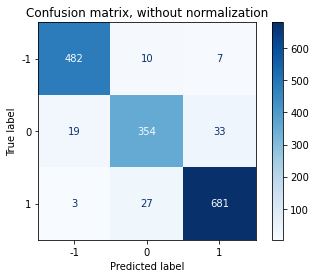

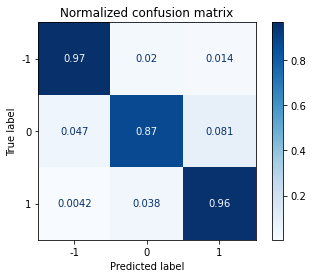

In [43]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()